In [3]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/sherli001/.conda/envs/singlecell/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] hgu219.db_3.2.3       org.Hs.eg.db_3.14.0   forcats_0.5.2        
 [4] stringr_1.5.0         dplyr_1.1.0           purrr_1.0.1          
 [7] readr_2.1.3           tidyr_1.3.0           tibble_3.1.7         
[10] ggplot2_3.3.6         tidyverse_1.3.2       AnnotationDbi_1.56.2 


In [2]:
library(WGCNA)
library(AnnotationDbi)
library(tidyverse)
library(ggplot2)
options(stringsAsFactors = FALSE)

library(hgu219.db)

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor


Warning message:
“package ‘AnnotationDbi’ was built under R version 4.1.3”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


In [4]:
load(file = "pairwise_RData_files/20230419_pairwise_WGCNA_ADNI_allSubjects_gender_rin_phase_corrected-01-dataInput.RData")
load(file = "pairwise_RData_files/20230419_CN_MCI_gender_rin_phase_corrected-02-networkConstruction-stepByStep.RData")
load(file = "pairwise_RData_files/20230419_datExpr_CN_MCI_gender_rin_phase_corrected_selectHVGs.RData")

In [5]:
ls()

[1] "datExpr_CN_AD_gender_rin_phase_corrected"   
 [2] "datExpr_CN_MCI_gender_rin_phase_corrected"  
 [3] "datExpr_CN_MCI_selectHVGs"                  
 [4] "datExpr_MCI_AD_gender_rin_phase_corrected"  
 [5] "datTraits_CN_AD_gender_rin_phase_corrected" 
 [6] "datTraits_CN_MCI_gender_rin_phase_corrected"
 [7] "datTraits_MCI_AD_gender_rin_phase_corrected"
 [8] "geneTree_CN_MCI_gender_rin_phase"           
 [9] "MEs_CN_MCI_gender_rin_phase"                
[10] "moduleColors_CN_MCI_gender_rin_phase"       
[11] "moduleLabels_CN_MCI_gender_rin_phase"

## Quantifying module-trait associations

In [6]:
# Define numbers of genes and samples
nGenes_CN_MCI <- ncol(datExpr_CN_MCI_selectHVGs)
nSamples_CN_MCI <- nrow(datExpr_CN_MCI_selectHVGs)

# Recalculate MEs with color labels
MEs0_CN_MCI = moduleEigengenes(datExpr_CN_MCI_selectHVGs, moduleColors_CN_MCI_gender_rin_phase)$eigengenes
MEs_CN_MCI = orderMEs(MEs0_CN_MCI)
moduleTraitCor_CN_MCI = cor(MEs_CN_MCI, datTraits_CN_MCI_gender_rin_phase_corrected, use = "p");
moduleTraitPvalue_CN_MCI = corPvalueStudent(moduleTraitCor_CN_MCI, nSamples_CN_MCI);

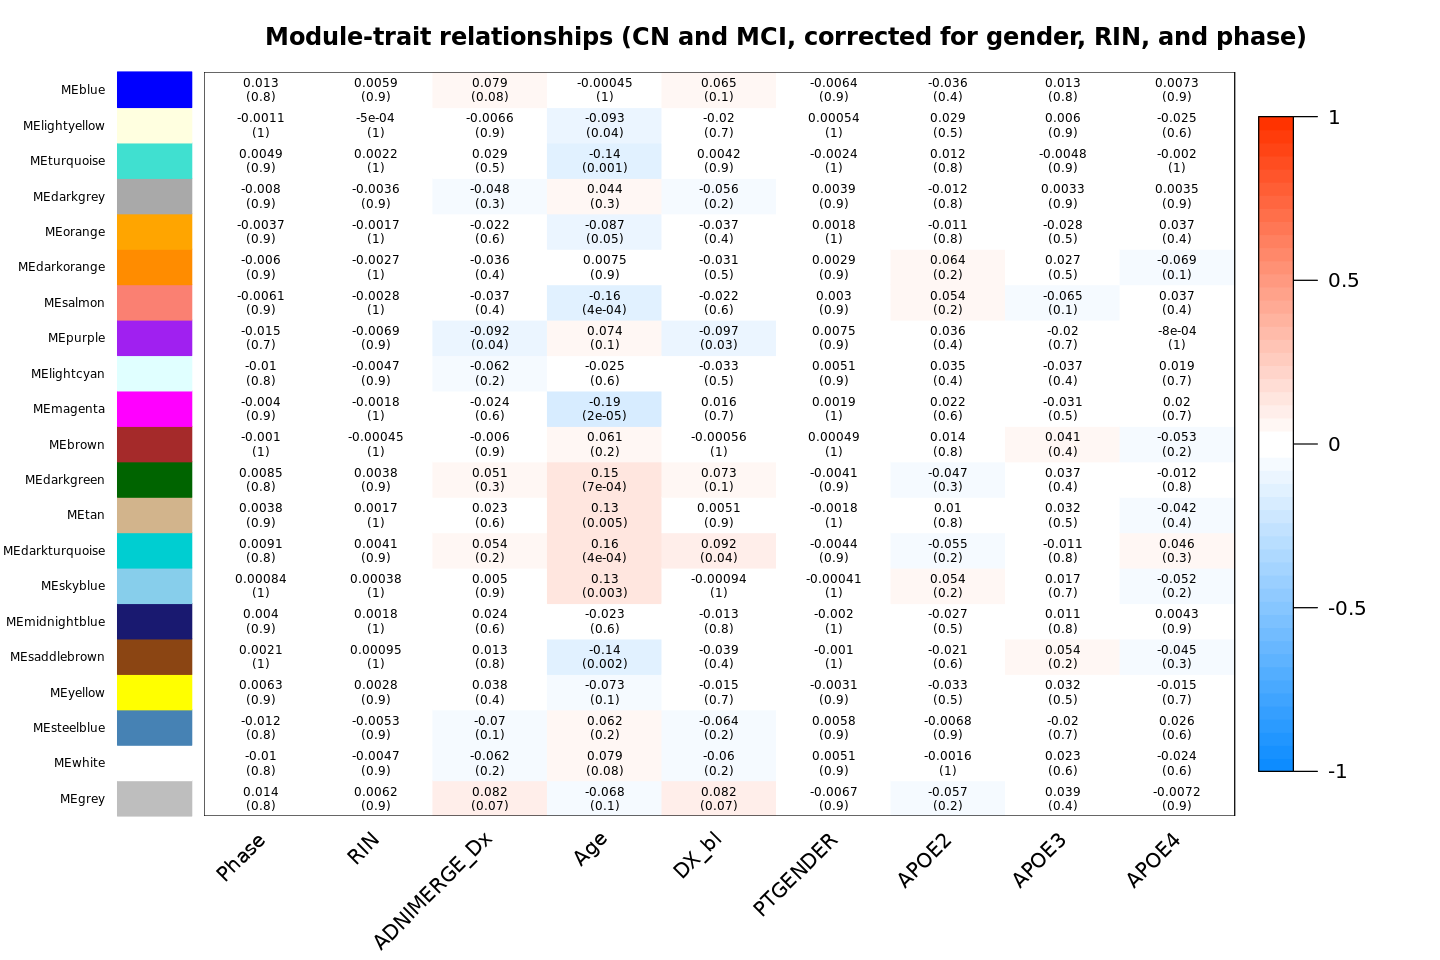

In [7]:
# sizeGrWindow(12,9)
options(repr.plot.width = 12, repr.plot.height = 8)
# Will display correlations and their p-values
textMatrix_CN_MCI = paste(signif(moduleTraitCor_CN_MCI, 2), "\n(",
                                        signif(moduleTraitPvalue_CN_MCI, 1), ")", sep = "");
dim(textMatrix_CN_MCI) = dim(moduleTraitCor_CN_MCI)
par(mar = c(6, 8.5, 3, 3));
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor_CN_MCI,
               xLabels = names(datTraits_CN_MCI_gender_rin_phase_corrected),
               yLabels = names(MEs_CN_MCI),
               ySymbols = names(MEs_CN_MCI),
               colorLabels = FALSE,
               colors = blueWhiteRed(50),
               textMatrix = textMatrix_CN_MCI,
               setStdMargins = FALSE,
               cex.text = 0.6,
               cex.lab.y = 0.6,
               zlim = c(-1,1),
               main = paste("Module-trait relationships (CN and MCI, corrected for gender, RIN, and phase)"))

In [8]:
pdf(file = "pairwise_plots/CN_MCI_moduleTraitCor.pdf", 
    width = 12, height = 9)

textMatrix_CN_MCI = paste(signif(moduleTraitCor_CN_MCI, 2), "\n(",
                                        signif(moduleTraitPvalue_CN_MCI, 1), ")", sep = "");
dim(textMatrix_CN_MCI) = dim(moduleTraitCor_CN_MCI)
par(mar = c(6, 8.5, 3, 3));
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor_CN_MCI,
               xLabels = names(datTraits_CN_MCI_gender_rin_phase_corrected),
               yLabels = names(MEs_CN_MCI),
               ySymbols = names(MEs_CN_MCI),
               colorLabels = FALSE,
               colors = blueWhiteRed(50),
               textMatrix = textMatrix_CN_MCI,
               setStdMargins = FALSE,
               cex.text = 0.6,
               cex.lab.y = 0.6,
               zlim = c(-1,1),
               main = paste("Module-trait relationships (CN and MCI, corrected for gender, RIN, and phase)"))

dev.off()

png 
  2

## Gene relationship to trait and important modules

In [9]:
# Define variable diagnosis containing diagnosis column of datTrait
diagnosis  <- as.data.frame(datTraits_CN_MCI_gender_rin_phase_corrected$ADNIMERGE_Dx)
names(diagnosis) <- "diagnosis"

In [10]:
# names (colors) of the modules
modNames_CN_MCI = substring(names(MEs_CN_MCI), 3)
modNames_CN_MCI

[1] "blue"          "lightyellow"   "turquoise"     "darkgrey"     
 [5] "orange"        "darkorange"    "salmon"        "purple"       
 [9] "lightcyan"     "magenta"       "brown"         "darkgreen"    
[13] "tan"           "darkturquoise" "skyblue"       "midnightblue" 
[17] "saddlebrown"   "yellow"        "steelblue"     "white"        
[21] "grey"

In [11]:
geneModuleMembership_CN_MCI <- as.data.frame(cor(datExpr_CN_MCI_selectHVGs, 
                                                MEs_CN_MCI, use = "p"))
MMPvalue_CN_MCI <- as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership_CN_MCI), 
                                                 nSamples_CN_MCI))

names(geneModuleMembership_CN_MCI) = paste("MM", modNames_CN_MCI, sep="");
names(MMPvalue_CN_MCI) = paste("p.MM", modNames_CN_MCI, sep="");

In [12]:
geneTraitSignificance_CN_MCI.diagnosis = as.data.frame(cor(datExpr_CN_MCI_selectHVGs, diagnosis, use = "p"));

GSPvalue_CN_MCI.diagnosis = as.data.frame(
    corPvalueStudent(as.matrix(geneTraitSignificance_CN_MCI.diagnosis), nSamples_CN_MCI));

names(geneTraitSignificance_CN_MCI.diagnosis) = paste("GS.", names(diagnosis), sep="");
names(GSPvalue_CN_MCI.diagnosis) = paste("p.GS.", names(diagnosis), sep="");

In [13]:
# convert probe names to gene symbols
vector_datExpr_CN_MCI_geneSymbols <- rep(0, length = ncol(datExpr_CN_MCI_selectHVGs))

vector_datExpr_CN_MCI_geneSymbols <- AnnotationDbi::mapIds(hgu219.db,
                                                          keys = datExpr_CN_MCI_selectHVGs %>% colnames,
                                                          column = "SYMBOL",
                                                          keytype = "PROBEID",
                                                          multiVals = "first")

'select()' returned 1:many mapping between keys and columns



In [14]:
df_datExpr_CN_MCI_geneSymbols <- data.frame(vector_datExpr_CN_MCI_geneSymbols)
colnames(df_datExpr_CN_MCI_geneSymbols) <- c("geneSymbol")

df_datExpr_CN_MCI_geneSymbols %>% head

,geneSymbol
,<chr>
11756083_x_at,HLA-DQA1
11732801_at,SIRPB1
11755998_x_at,HLA-DRB4
11760799_x_at,HLA-DPB1
11732800_a_at,SIRPB1
11752660_a_at,SIRPB1


In [15]:
# Create the starting data frame
geneInfo0_CN_MCI_diagnosis = data.frame(geneProbe = rownames(df_datExpr_CN_MCI_geneSymbols),
                                       geneSymbol = df_datExpr_CN_MCI_geneSymbols$geneSymbol,
                                       moduleColor = moduleColors_CN_MCI_gender_rin_phase,
                                       geneTraitSignificance_CN_MCI.diagnosis,
                                       GSPvalue_CN_MCI.diagnosis)

# Order modules by their significance for weight
modOrder_CN_MCI_diagnosis = order(-abs(cor(MEs_CN_MCI, diagnosis, use = "p")));
# Add module membership information in the chosen order
for (mod in 1:ncol(geneModuleMembership_CN_MCI))
{
    oldNames_diagnosis = names(geneInfo0_CN_MCI_diagnosis)
    geneInfo0_CN_MCI_diagnosis = data.frame(geneInfo0_CN_MCI_diagnosis, geneModuleMembership_CN_MCI[, modOrder_CN_MCI_diagnosis[mod]],
                                     MMPvalue_CN_MCI[, modOrder_CN_MCI_diagnosis[mod]]);
    names(geneInfo0_CN_MCI_diagnosis) = c(oldNames_diagnosis, paste("MM.", modNames_CN_MCI[modOrder_CN_MCI_diagnosis[mod]], sep=""),
                                   paste("p.MM.", modNames_CN_MCI[modOrder_CN_MCI_diagnosis[mod]], sep=""))
}
# Order the genes in the geneInfo variable first by module color, then by geneTraitSignificance
geneOrder_CN_MCI_diagnosis = order(geneInfo0_CN_MCI_diagnosis$moduleColor, -abs(geneInfo0_CN_MCI_diagnosis$GS.diagnosis));
geneInfo_CN_MCI_diagnosis = geneInfo0_CN_MCI_diagnosis[geneOrder_CN_MCI_diagnosis, ]

In [16]:
geneInfo_CN_MCI_diagnosis %>% head

,geneProbe,geneSymbol,moduleColor,GS.diagnosis,p.GS.diagnosis,MM.purple,p.MM.purple,MM.grey,p.MM.grey,MM.blue,⋯,MM.orange,p.MM.orange,MM.saddlebrown,p.MM.saddlebrown,MM.lightyellow,p.MM.lightyellow,MM.brown,p.MM.brown,MM.skyblue,p.MM.skyblue
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11727701_a_at,11727701_a_at,FAM185A,blue,0.1636345,0.0002314154,-0.04669803,2.963709e-01,0.022709734,0.61172216,0.2293311,⋯,0.04237207,0.343424676,-0.08203875,6.626569e-02,0.01284658,0.77401547,0.10087413,2.380546e-02,-0.02743547,5.396882e-01
11737167_at,11737167_at,ANKRD34B,blue,0.1449598,0.0011259673,-0.24915730,1.531354e-08,-0.033136427,0.45882315,0.4182629,⋯,-0.09055713,0.042552569,0.13488624,2.457778e-03,0.05647178,0.20654448,-0.10646675,1.702049e-02,0.24540114,2.547560e-08
11720541_at,11720541_at,LGALSL,blue,0.1449081,0.0011306399,-0.31797176,2.948396e-13,-0.006470954,0.88500765,0.5059063,⋯,-0.07916425,0.076384004,0.19967441,6.541090e-06,-0.08077633,0.07056504,-0.19263381,1.386175e-05,0.14369999,1.244874e-03
11720595_a_at,11720595_a_at,CD46,blue,0.1442796,0.0011888072,-0.22992743,1.901585e-07,-0.080234058,0.07248056,0.6282669,⋯,-0.08856872,0.047326555,0.10562082,1.792337e-02,0.04033138,0.36718800,0.02182245,6.257065e-01,0.17664721,6.911480e-05
11751306_a_at,11751306_a_at,FBXO28,blue,0.1415656,0.0014730085,-0.11915404,7.527474e-03,-0.094091178,0.03506833,0.2828058,⋯,-0.13278185,0.002874801,0.04398643,3.253364e-01,0.08202175,0.06632214,-0.05413787,2.259558e-01,0.16645286,1.794582e-04
11762252_at,11762252_at,DAPP1,blue,0.1391944,0.0017710702,-0.24227546,3.866609e-08,-0.033768451,0.45029495,0.4439507,⋯,-0.08352431,0.061484461,0.07713302,8.426517e-02,-0.13970348,0.00170277,0.06927401,1.211170e-01,0.10661630,1.686509e-02


In [17]:
write.csv(geneInfo_CN_MCI_diagnosis, file = "pairwise_csv_files/20230419_geneInfo_CN_MCI_gender_rin_phase_corrected.csv")

In [18]:
entrezCodes_CN_MCI <- AnnotationDbi::mapIds(hgu219.db,
                                           keys = datExpr_CN_MCI_selectHVGs %>% colnames,
                                           column = "ENTREZID",
                                           keytype = "PROBEID",
                                           multiVals = "first")

'select()' returned 1:many mapping between keys and columns



In [19]:
GOenr_CN_MCI_diagnosis = GOenrichmentAnalysis(moduleColors_CN_MCI_gender_rin_phase, entrezCodes_CN_MCI, organism = "human", nBestP = 10);

Warning message in GOenrichmentAnalysis(moduleColors_CN_MCI_gender_rin_phase, entrezCodes_CN_MCI, :
“This function is deprecated and will be removed in the near future. 
We suggest using the replacement function enrichmentAnalysis 
in R package anRichment, available from the following URL:
https://labs.genetics.ucla.edu/horvath/htdocs/CoexpressionNetwork/GeneAnnotation/”
Loading required package: GO.db



 GOenrichmentAnalysis: loading annotation data...
  ..of the 10016  Entrez identifiers submitted, 9721 are mapped in current GO categories.
  ..will use 9721 background genes for enrichment calculations.
  ..preparing term lists (this may take a while).. 
  ..working on label set 1 ..
    ..calculating enrichments (this may also take a while)..
    ..putting together terms with highest enrichment significance..


In [20]:
tab_CN_MCI_diagnosis = GOenr_CN_MCI_diagnosis$bestPTerms[[4]]$enrichment

In [21]:
tab_CN_MCI_diagnosis %>% head

,module,modSize,bkgrModSize,rank,enrichmentP,BonferoniP,nModGenesInTerm,fracOfBkgrModSize,fracOfBkgrTermSize,bkgrTermSize,termID,termOntology,termName,termDefinition
,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
GO:0016798,blue,1395,1346,1,1.850222e-05,0.3440119,28,0.020802377,0.3111111,90,GO:0016798,MF,"hydrolase activity, acting on glycosyl bonds",Catalysis of the hydrolysis of any glycosyl bond.
GO:0000462,blue,1395,1346,2,5.322123e-04,1.0000000,11,0.008172363,0.4074074,27,GO:0000462,BP,"maturation of SSU-rRNA from tricistronic rRNA transcript (SSU-rRNA, 5.8S rRNA, LSU-rRNA)","Any process involved in the maturation of a precursor Small SubUnit (SSU) ribosomal RNA (rRNA) molecule into a mature SSU-rRNA molecule from the pre-rRNA molecule originally produced as a tricistronic rRNA transcript that contains the Small Subunit (SSU) rRNA, 5.8S rRNA, and the Large Subunit (LSU) in that order from 5' to 3' along the primary transcript."
GO:0048806,blue,1395,1346,3,7.246232e-04,1.0000000,9,0.006686478,0.4500000,20,GO:0048806,BP,genitalia development,"The process whose specific outcome is the progression of the genitalia over time, from its formation to the mature structure."
GO:0030688,blue,1395,1346,4,7.673912e-04,1.0000000,7,0.005200594,0.5384615,13,GO:0030688,CC,"preribosome, small subunit precursor","A preribosomal complex consisting of 20S pre-rRNA, ribosomal proteins including late-associating small subunit proteins, and associated proteins; a precursor of the eukaryotic cytoplasmic small ribosomal subunit."
GO:0046434,blue,1395,1346,5,9.053237e-04,1.0000000,25,0.018573551,0.2631579,95,GO:0046434,BP,organophosphate catabolic process,"The chemical reactions and pathways resulting in the breakdown of organophosphates, any phosphate-containing organic compound."
GO:0006757,blue,1395,1346,6,9.214749e-04,1.0000000,15,0.011144131,0.3260870,46,GO:0006757,BP,ATP generation from ADP,"The process of introducing a phosphate group into ADP, adenosine diphosphate, to produce ATP."


In [22]:
write.table(tab_CN_MCI_diagnosis, file = "pairwise_csv_files/20230419_GOEnrichmentTable_CN_MCI_gender_rin_phase_corrected.csv", sep = ",", quote = TRUE, row.names = FALSE)